In [29]:
import lightgbm
from testbed.models.treeffuser import Treeffuser

import matplotlib.pyplot as plt
import numpy as np


from numpy.random import PCG64
from _branching_mixture import CustomRandomGenerator, branching_mixture_density

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
mpl.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Times New Roman"],  # ["Computer Modern"],  #
        "font.size": 12,
    }
)

In [31]:
rng = CustomRandomGenerator(PCG64(seed=0))

n = 3 * 10**3
scale = 0.05
x, y = rng.branching_mixture(scale=scale, size=n)

# model = tf.LightGBMTreeffuser(sde_initialize_with_data=True)
model = Treeffuser(n_repeats=100)
fit = model.fit(X=x.reshape(-1, 1), y=y.reshape(-1, 1))

## Figure 1

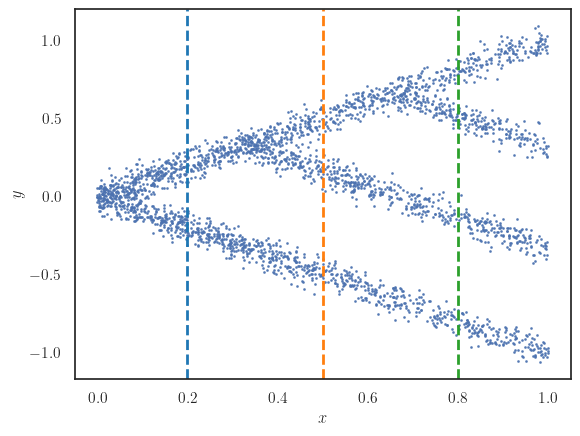

In [37]:
plt.scatter(x, y, s=1, alpha=0.8)
plt.xlabel("$x$")
plt.ylabel("$y$")
color_palette = sns.color_palette("tab10", n_colors=10)
colors = {
    0.2: color_palette[0],
    0.5: color_palette[1],
    0.8: color_palette[2],
}
for xx, c in colors.items():
    plt.axvline(xx, 0, 1, c=c, lw=2, ls="--")
plt.savefig("fig/branching_mixture_data-samples.pdf", format="pdf", dpi=600)

## Figure 2

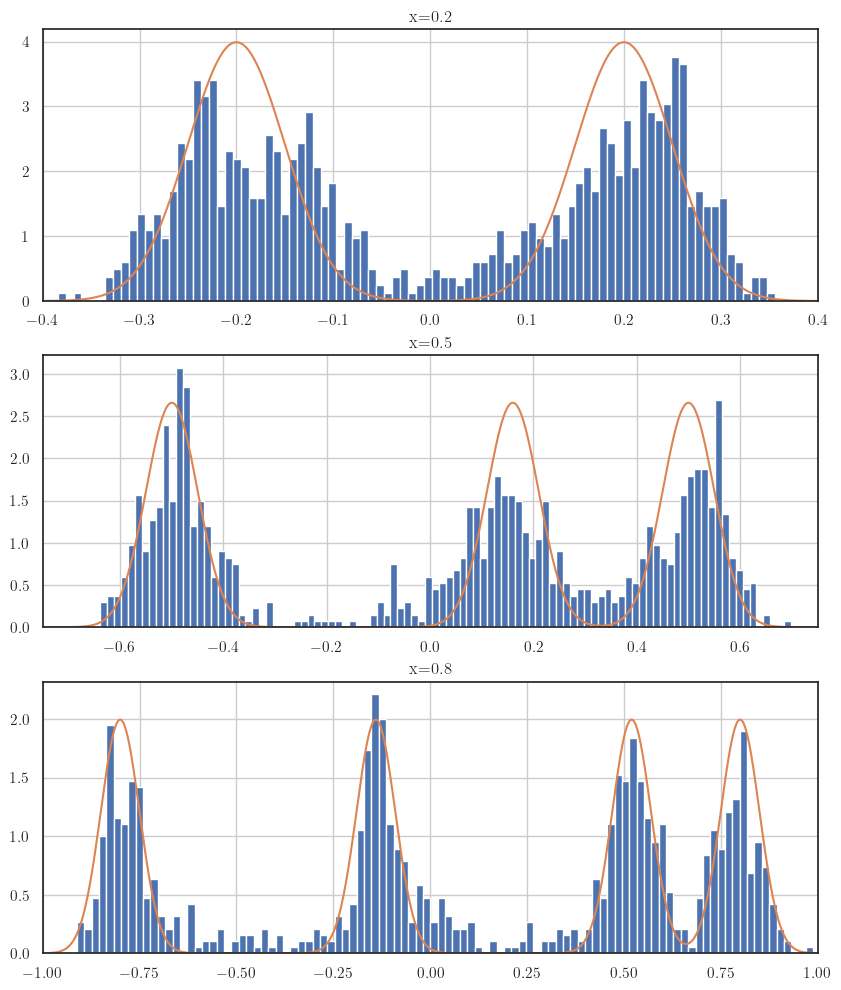

In [20]:
X = (np.array([0.2, 0.5, 0.8])).reshape(-1, 1)
bandwidhts = [0.1, 0.09, 0.045]
y_lims = [(-0.4, 0.4), (-0.75, 0.75), (-1, 1)]

fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i, bw in enumerate(bandwidhts):
    y_plot = np.linspace(y_lims[i][0], y_lims[i][1], 1000).reshape(-1, 1)

    y_samples = model.sample(X[i].reshape(1, 1), n_samples=10**3)
    axs[i].hist(y_samples.reshape(-1), bins=100, density=True)

    density_true = branching_mixture_density(X[i], scale=scale)
    density_true = density_true(y_plot)
    axs[i].plot(y_plot, density_true, label="true")

    # plt.legend()
    axs[i].set_xlim(y_lims[i][0], y_lims[i][1])
    axs[i].set_title(f"x={np.round(X[i], 2).item()}")
    axs[i].grid()

## Figure 3

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
mpl.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Times New Roman"],  # ["Computer Modern"],  #
        "font.size": 12,
    }
)

In [23]:
X = (np.array([2, 5, 8]) / 10).reshape(-1, 1)

n_samples = 3 * 10**3
x_vals = []
y_samples = []
for x in X:
    x_vals.extend([np.round(x, 2)] * n_samples)
    samples = model.sample(x.reshape(1, 1), n_samples=n_samples).reshape(-1).tolist()
    y_samples.extend(samples)

df = pd.DataFrame({"x": x_vals, "y": y_samples})
df["x"] = df["x"].astype("float")

/Users/achille/miniconda3/envs/treefuse/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/achille/miniconda3/envs/treefuse/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/achille/miniconda3/envs/treefuse/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


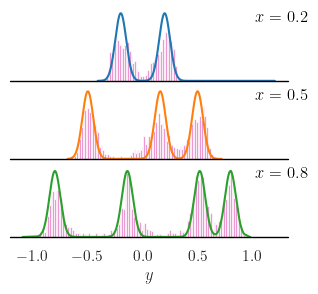

In [24]:
color_palette = sns.color_palette("tab10", n_colors=10)
colors = {
    0.2: color_palette[0],
    0.5: color_palette[1],
    0.8: color_palette[2],
}
histogram_color = color_palette[6]
binwidth = 0.015

# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="x", aspect=3.5, height=1.1, palette=colors, sharey=False, hue="x", )

# Draw histograms
g.map(
    sns.histplot,
    "y",
    bins=100,
    binwidth=binwidth,
    kde=False,
    stat="density",
    color=histogram_color,
    linewidth=0.5,
)


# Define a function to plot the curve on top of the histogram
def plot_curve(**kwargs):
    data = kwargs["data"]
    y = data["y"].values
    x_val = data["x"].iloc[0]
    density_true = branching_mixture_density(x_val, scale=scale)
    density_true = density_true(y)
    sorted_indices = np.argsort(y)
    plt.plot(y[sorted_indices], density_true[sorted_indices], color=kwargs["color"])


g.map_dataframe(plot_curve)

# Color horizontal axis in black
g.refline(y=0, linewidth=1, linestyle="-", color="black", clip_on=False)
g.set(xlabel="$y$")


# Define and use a simple function to label the plot in axes coordinates
def label(**kwargs):
    ax = plt.gca()
    data = kwargs["data"]
    x_val = data["x"].iloc[0]
    ax.text(
        0.88,
        0.9,
        f"$x$ = {x_val}",
        color="black",  # Set label color to black
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map_dataframe(label)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=+0.1)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")

# Remove vertical lines
g.despine(bottom=True, left=True)

g.savefig("fig/branching_mixture.pdf", format="pdf", dpi=600)

/Users/achille/miniconda3/envs/treefuse/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/achille/miniconda3/envs/treefuse/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/achille/miniconda3/envs/treefuse/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


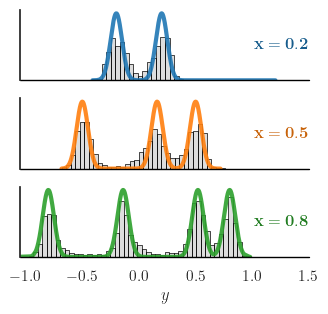

In [27]:
colors = {"blue": "#1f77b4", "orange": "#ff7f0e"}

color_palette = sns.color_palette("tab10", n_colors=10)
colors = {
    0.2: color_palette[0],
    0.5: color_palette[1],
    0.8: color_palette[2],
}
histogram_color = "#555555"
density_color = colors[0.5]


binwidth = 0.04

# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="x", aspect=3, height=1.1, palette=colors, sharey=False, hue="x", )
# Draw histograms


# Define a function to plot the curve on top of the histogram
def plot_curve(**kwargs):
    data = kwargs["data"]
    color = '#%02x%02x%02x' % tuple([int(c*255) for c in kwargs["color"]])
    darker_color = '#%02x%02x%02x' % tuple([int(c*200) for c in kwargs["color"]])
    y = data["y"].values
    x_val = data["x"].iloc[0]
    density_true = branching_mixture_density(x_val, scale=scale)
    # y = np.linspace(x_val * X_SHIFT_COEFFICIENT, 8, 1000)
    density_true = density_true(y)
    # density_true = np.where(density_true == 0, None, density_true)
    sorted_indices = np.argsort(y)
    # remove indices where y is nan or none or denisty is nan
    sorted_indices = sorted_indices[~np.isnan(y[sorted_indices])]
    sorted_indices = [i for i in sorted_indices if not np.isnan(density_true[i])]
    plt.plot(y[sorted_indices], density_true[sorted_indices], color=color, lw=3, alpha=0.9)
    # fill under the curve
    # plt.fill_between(y[sorted_indices], density_true[sorted_indices].astype(float), color=color, alpha=0.1, zorder=-1)


g.map_dataframe(plot_curve)
g.map(
    sns.histplot,
    "y",
    # bins=bins+0.1,
    binwidth=binwidth,
    kde=False,
    stat="density",
    color=histogram_color,
    alpha=0.2,
    # make edge darker
    edgecolor="black",
    linewidth=0.5,
)


# Color horizontal axis in black
g.refline(y=0, linewidth=1, linestyle="-", color="black", clip_on=False)
g.set(xlabel="$y$")
g.set(xlim=[-1.05, 1.5])
# g.set(ylim=[0, 3])


# Define and use a simple function to label the plot in axes coordinates
def label(**kwargs):
    ax = plt.gca()
    data = kwargs["data"]
    x_val = data["x"].iloc[0]
    darker_color = '#%02x%02x%02x' % tuple([int(c*200) for c in kwargs["color"]])
    ax.text(
        1,
        0.5,
        f"$\\mathbf{{x={x_val}}}$",
        color=darker_color,
        fontweight="bold",
        ha="right",
        va="center",
        transform=ax.transAxes,
    )


g.map_dataframe(label)
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.1)


# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")

# Remove vertical lines
g.despine(bottom=True, left=False)
plt.tight_layout()
g.savefig("fig/branching_mixture.pdf", format="pdf", dpi=600, bbox_inches="tight")